In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

In [2]:
sns.set_style("white")
sns.set(font_scale=1.5)

In [3]:
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [4]:
sjer_roads_path = os.path.join("data", "spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

In [5]:
sjer_aoi_path = os.path.join("data", "spatial-vector-lidar", "california", 
                             "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

In [6]:
print(sjer_roads.crs)
print(sjer_aoi.crs)

EPSG:4269
EPSG:32611


In [7]:
sjer_aoi_wgs84  = sjer_aoi.to_crs(epsg=4269)

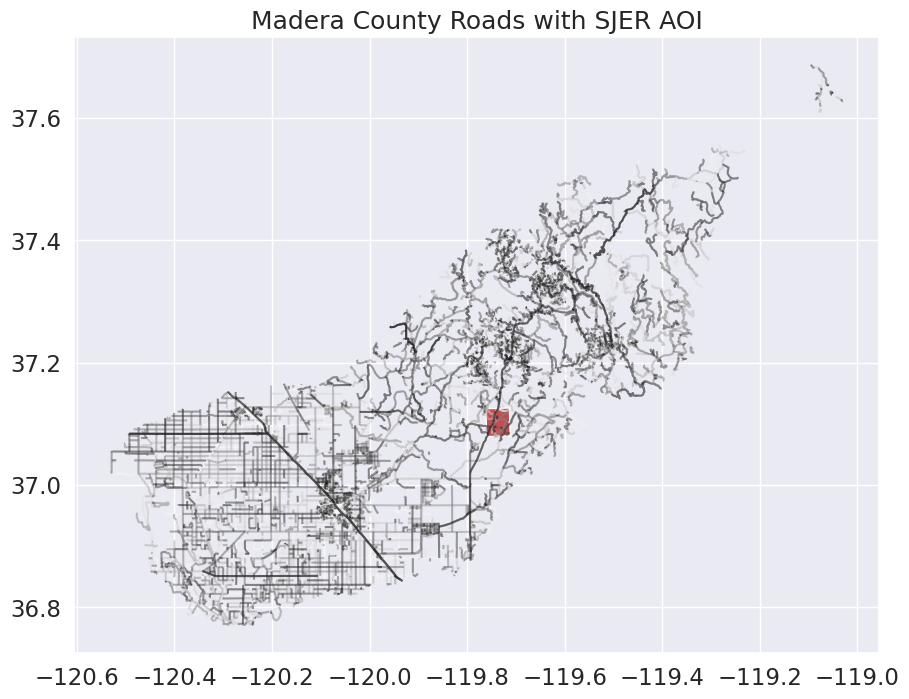

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

sjer_roads.plot(cmap='Greys', ax=ax, alpha=.5)
sjer_aoi_wgs84.plot(ax=ax, markersize=10, color='r')

ax.set_title("Madera County Roads with SJER AOI");

In [9]:
state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

# View data structure
type(state_boundary_us)

geopandas.geodataframe.GeoDataFrame

In [10]:
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


<Axes: >

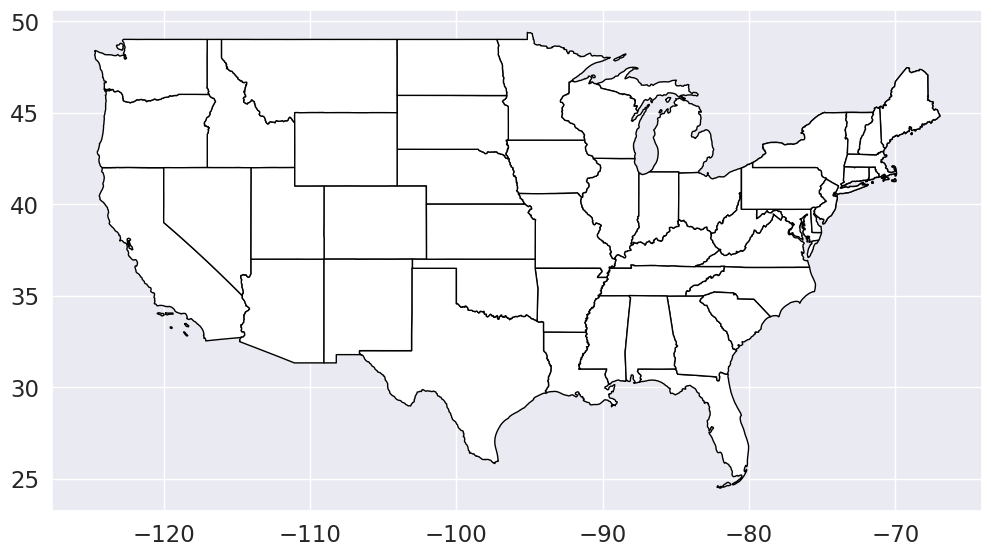

In [11]:
fig, ax = plt.subplots(figsize = (12,8))
state_boundary_us.plot(ax = ax, facecolor = 'white', edgecolor = 'black')

In [12]:
ax.set(title="Map of Continental US State Boundaries\n United States Census Bureau Data")

[Text(0.5, 1.0, 'Map of Continental US State Boundaries\n United States Census Bureau Data')]

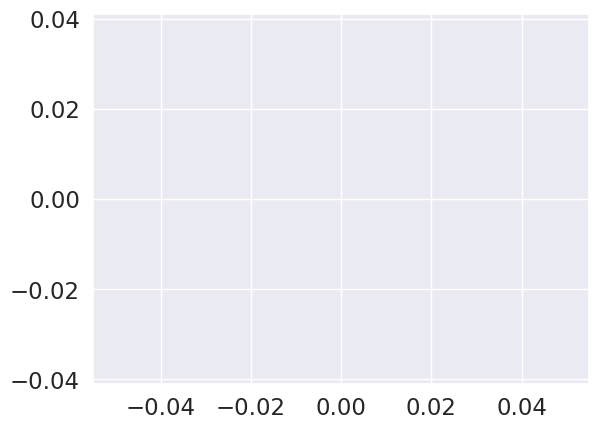

In [13]:
plt.axis('equal')
ax.set_axis_off()

plt.show()

In [14]:
county_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                       "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(county_boundary_us_path)

type(country_boundary_us)

geopandas.geodataframe.GeoDataFrame

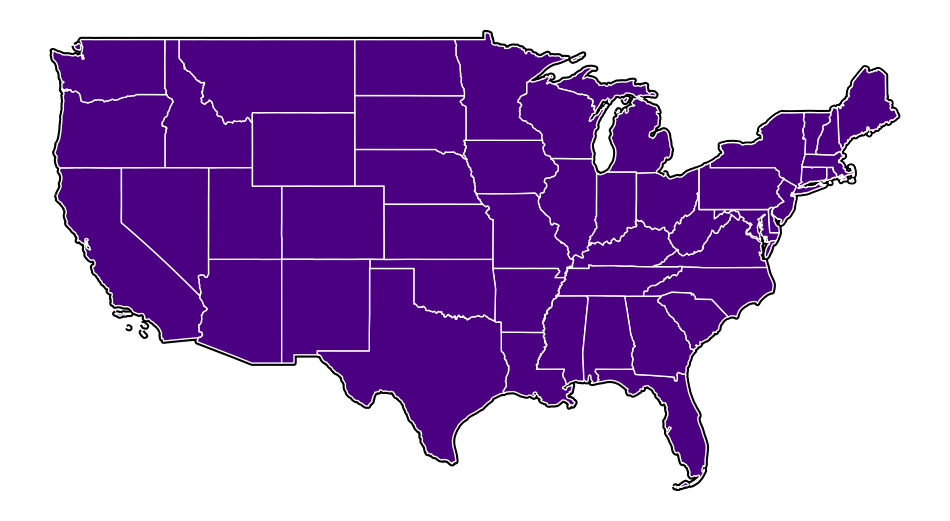

In [15]:
fig, ax = plt.subplots(figsize = (12,7))
country_boundary_us.plot(ax=ax, 
                         alpha=1, 
                         edgecolor="black",
                         color = "white",
                         linewidth=4)

state_boundary_us.plot(ax = ax, 
                      color = "indigo",
                      edgecolor = "white",
                      linewidth = 1)
ax.set_axis_off()
plt.show()

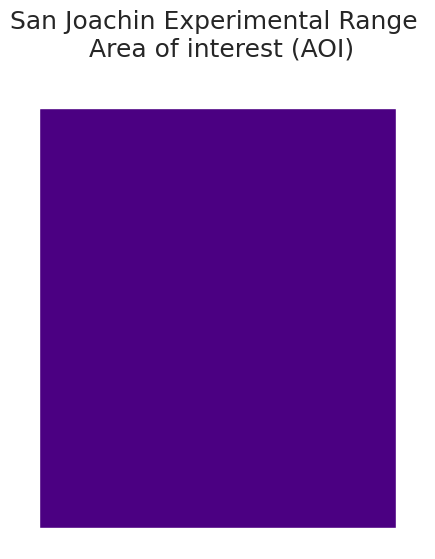

In [16]:
fig, ax = plt.subplots(figsize = (6,6))

sjer_aoi.plot(ax=ax, color = "indigo")
ax.set(title='San Joachin Experimental Range \n Area of interest (AOI)')

ax.set_axis_off()
plt.show()

<Axes: >

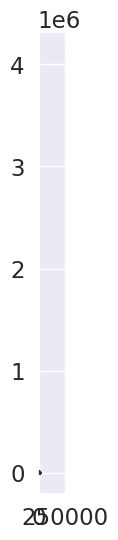

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

country_boundary_us.plot(ax=ax, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3, 
                         alpha=.8)

state_boundary_us.plot(ax = ax, 
                       color = "white", 
                       edgecolor ="gray")
sjer_aoi.plot(ax=ax, color = "indigo")

In [18]:
ax.set_axis_off()
plt.show()